# Umrechnung $𝑚𝑔/𝑚^3$ in ppm

Der $CO_2$-Gehalt in der Luft wird in parts per million (Anteile pro Million), kurz ppm, oder in Prozent (%), beziehungsweise Volumenprozent (Vol.-%) angegeben. Zu Beginn der Industrialisierung, um 1750 lag die $CO_2$-Konzentration bei 278 ppm.[^6] [^7] Diese historischen Daten sind in ppm, die Messtelle gibt die Kohlendioxidangaben in $𝑚𝑔/𝑚^3$ an. Um die Massenkonzentrationen und Volumenmischungsverhältnisse besser vergleichen zu können, werden sie in diesem Abschnitt umgewandelt. Die Angaben als Massenkonzentrationen in $𝑚𝑔/𝑚^3$ gelten nur für die bestimmten Bedingungen von Druck und Temperatur. Der Befehl df_wasserkuppe.info() liefert uns das maximal 76646 Werte ppm berechnen könnten. Da nur für 76646 Luftdruckwerte vorhanden sind.

 




Stand: 27.04.2021

In [32]:
df_wasserkuppe = pd.read_csv('daten/wasserkuppe.csv')
df_wasserkuppe.index = pd.to_datetime(df_wasserkuppe.Datum)

In [33]:
df_wasserkuppedrop = df_wasserkuppe.dropna()
df_wasserkuppedrop = df_wasserkuppedrop.drop(columns=['Datum'])

df_wasserkuppedrop

,Temperatur,Luftdruck,Kohlendioxid
Datum,,,
2011-01-09 12:00:00,13.4,1014.0,724.0
2011-01-09 13:00:00,14.6,1014.0,726.0
2011-01-09 14:00:00,15.6,1014.0,729.0
2011-01-09 15:00:00,15.6,1013.0,720.0
2011-01-09 16:00:00,15.6,1013.0,721.0
...,...,...,...
2020-04-06 20:00:00,8.8,994.0,735.0
2020-04-06 21:00:00,8.8,995.0,737.0
2020-04-06 22:00:00,8.8,995.0,739.0


## Umrechnungsformel

mg = 0.1*ppm1*mol/((8.31447*(t+273.15))/p)

ppm = 10*mg2/mol*((8.31447*(t+273.15))/p)
  
  
mg2...ist die Massenkonzentration des Messwertes Kohlendioxid in mg/m3 

p...ist der Bezugsdruck. Der Normdruck wäre 1013,25 mbar.

mol...die molare Masse von Kohlendioxid in g/mol:
44,01 g/mol

10 ergibt sich als Umrechnungsfaktor, da keine konsistenten Einheiten verwendet werden[^10]

R ist die Universelle Gaskonstante = 8,314472 J/(K·mol)


In [34]:
t= 13.4
p=1013.25
mol=44.01
mg2=724

ppm = 10*mg2/mol*((8.31447*(t+273.15))/p)
ppm

386.8170144884977

Berechnung der Werte 2011-01-09 12:00:00 und 2020-05-06 00:00:00

In [35]:
t= 6.5
p=995
mol=44.01
mg2=737

ppm = 10*mg2/mol*((8.31447*(t+273.15))/p)
ppm

391.32936019874427

In [36]:
t= 13.4
p=1014
mol=44.01
mg2=724

ppm = 10*mg2/mol*((8.31447*(t+273.15))/p)
ppm

386.5309072292606

In [37]:
t = df_wasserkuppedrop['Temperatur']
p = df_wasserkuppedrop['Luftdruck']
mol = 44.01
mg2 = df_wasserkuppedrop['Kohlendioxid']

df_wasserkuppedrop['ppm'] = 10*mg2/mol*((8.31447*(t+273.15))/p)

df_wasserkuppedrop['ppm']

Datum
2011-01-09 12:00:00    386.530907
2011-01-09 13:00:00    389.221839
2011-01-09 14:00:00    392.188422
2011-01-09 15:00:00    387.728965
2011-01-09 16:00:00    388.267478
                          ...    
2020-04-06 20:00:00    393.873041
2020-04-06 21:00:00    394.547875
2020-04-06 22:00:00    395.618561
2020-04-06 23:00:00    394.467844
2020-05-06 00:00:00    391.329360
Name: ppm, Length: 75072, dtype: float64

In [38]:
df_wasserkuppedrop

,Temperatur,Luftdruck,Kohlendioxid,ppm
Datum,,,,
2011-01-09 12:00:00,13.4,1014.0,724.0,386.530907
2011-01-09 13:00:00,14.6,1014.0,726.0,389.221839
2011-01-09 14:00:00,15.6,1014.0,729.0,392.188422
2011-01-09 15:00:00,15.6,1013.0,720.0,387.728965
2011-01-09 16:00:00,15.6,1013.0,721.0,388.267478
...,...,...,...,...
2020-04-06 20:00:00,8.8,994.0,735.0,393.873041
2020-04-06 21:00:00,8.8,995.0,737.0,394.547875
2020-04-06 22:00:00,8.8,995.0,739.0,395.618561


In [39]:
dfco2m = df_wasserkuppedrop.resample('M').mean()
dfco2m

,Temperatur,Luftdruck,Kohlendioxid,ppm
Datum,,,,
2011-01-31,9.861905,1018.083333,718.535714,377.267934
2011-02-28,10.933333,1015.166667,718.979167,380.087965
2011-03-31,10.738542,1012.093750,723.416667,383.434028
2011-04-30,10.977660,1008.351064,724.648936,385.891135
2011-05-31,8.386458,1008.500000,723.479167,381.627605
...,...,...,...,...
2020-08-31,5.670833,1020.233333,751.100000,387.711256
2020-09-30,7.174167,1014.941667,745.800000,389.088071
2020-10-31,5.693333,1009.225000,741.425000,386.948444


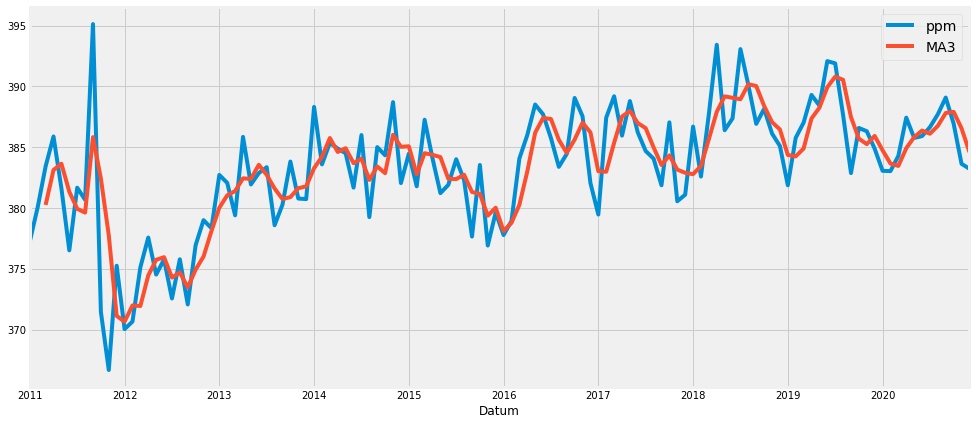

In [40]:
import matplotlib.pyplot as plt
import matplotlib.style as style

dfco2m['ppm'].plot(label = 'ppm', figsize=(15,7))
dfco2m['MA3'] = dfco2m['ppm'].rolling(3).mean()
dfco2m['MA3'].plot(label='MA3')
style.use('fivethirtyeight')
plt.legend()

Quellenangaben:

[^1]: Kohlendioxid-Konzentration – Klimawandel. (2019). bildungsserver. https://wiki.bildungsserver.de/klimawandel/index.php/Kohlendioxid-Konzentration

[^2]: Wikipedia-Autoren. (2007, 16. Mai). Kohlenstoffdioxid in der Erdatmosphäre. Wikipedia. https://de.wikipedia.org/wiki/Kohlenstoffdioxid_in_der_Erdatmosph%C3%A4re


[^3]: ppm in mg/m3. (2019). NABU Eibelshausen. http://www.nabu-eibelshausen.de/Rechner/ppm.html